In [1]:
from imaster_paper_args import *

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

In [8]:
outp={}
cl_sim_W={}
zs_bin={}
zl_bin={}
cl0={}
cl0_win0={}
# l_bins={}
use_shot_noise={}
skylens_kwargs={}

In [17]:
labels={}
labels[corr_gg]=r'$gg$'
labels[corr_ll]=r'$\gamma\gamma$'
labels[corr_ggl]=r'$g \gamma$'

corr_labels={}
corr_labels[corr_ll]=r'$\gamma\gamma^{EE}$'
corr_labels['shear_B']=r'$\gamma\gamma^{BB}$'
corr_labels[corr_gg]=r'$gg$'
corr_labels[corr_ggl]=r'$g\gamma$'

master_labels={}
master_labels['Master']=r'Master'
master_labels['iMaster']=r'$i$Master'
master_labels['nMaster']=r'cMaster'


corr_fnames={}
corr_fnames[corr_ll]='ll'
corr_fnames[corr_gg]='gg'
corr_fnames[corr_ggl]='ggl'

In [10]:
file_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/tests/'
# fnames={0:file_home+'xi0_cl0_sims_newN10_ns512_lmax512_wlmax1025_fsky0.3_noSN_deltaW.pkl'}
# fnames[1]=file_home+'cl0_sims_newN100_ns1024_lmax1000_wlmax2001_fsky0.3_noSN_cWin_delta.pkl'
fnames={0:file_home+'cl0_sims_newN1000_ns1024_lmax1000_wlmax2001_fsky0.3_deltaW.pkl'}
fnames[1]=file_home+'cl0_sims_newN1000_ns1024_lmax1000_wlmax2001_fsky0.3_cWin_deltaW.pkl'

fnames={0:file_home+'cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky0.3_deltaW.pkl'}
fnames[1]=file_home+'cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky0.3_cWin_deltaW.pkl'

for i in fnames.keys():
    with open(fnames[i],'rb') as f:
        outp[i]=pickle.load(f)

    cl_sim_W[i]=outp[i]['simW']
    zs_bin[i]=outp[i]['shear_zbins']
    zl_bin[i]=outp[i]['galaxy_zbins']
    cl0[i]=outp[i]['cl0']
    cl0_win0[i]=outp[i]['cl0_win']
#     l_bins[i]=cl_sim_W[i]['l_bins']
    use_shot_noise[i]=cl_sim_W[i]['use_shot_noise']
    skylens_kwargs[i]=outp[i]['Skylens_kwargs']

In [11]:
nsim=1000

('shear', 'shear') 0
('shear', 'shear') 1
('galaxy', 'shear') 2
('galaxy', 'galaxy') 3
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW.pdf


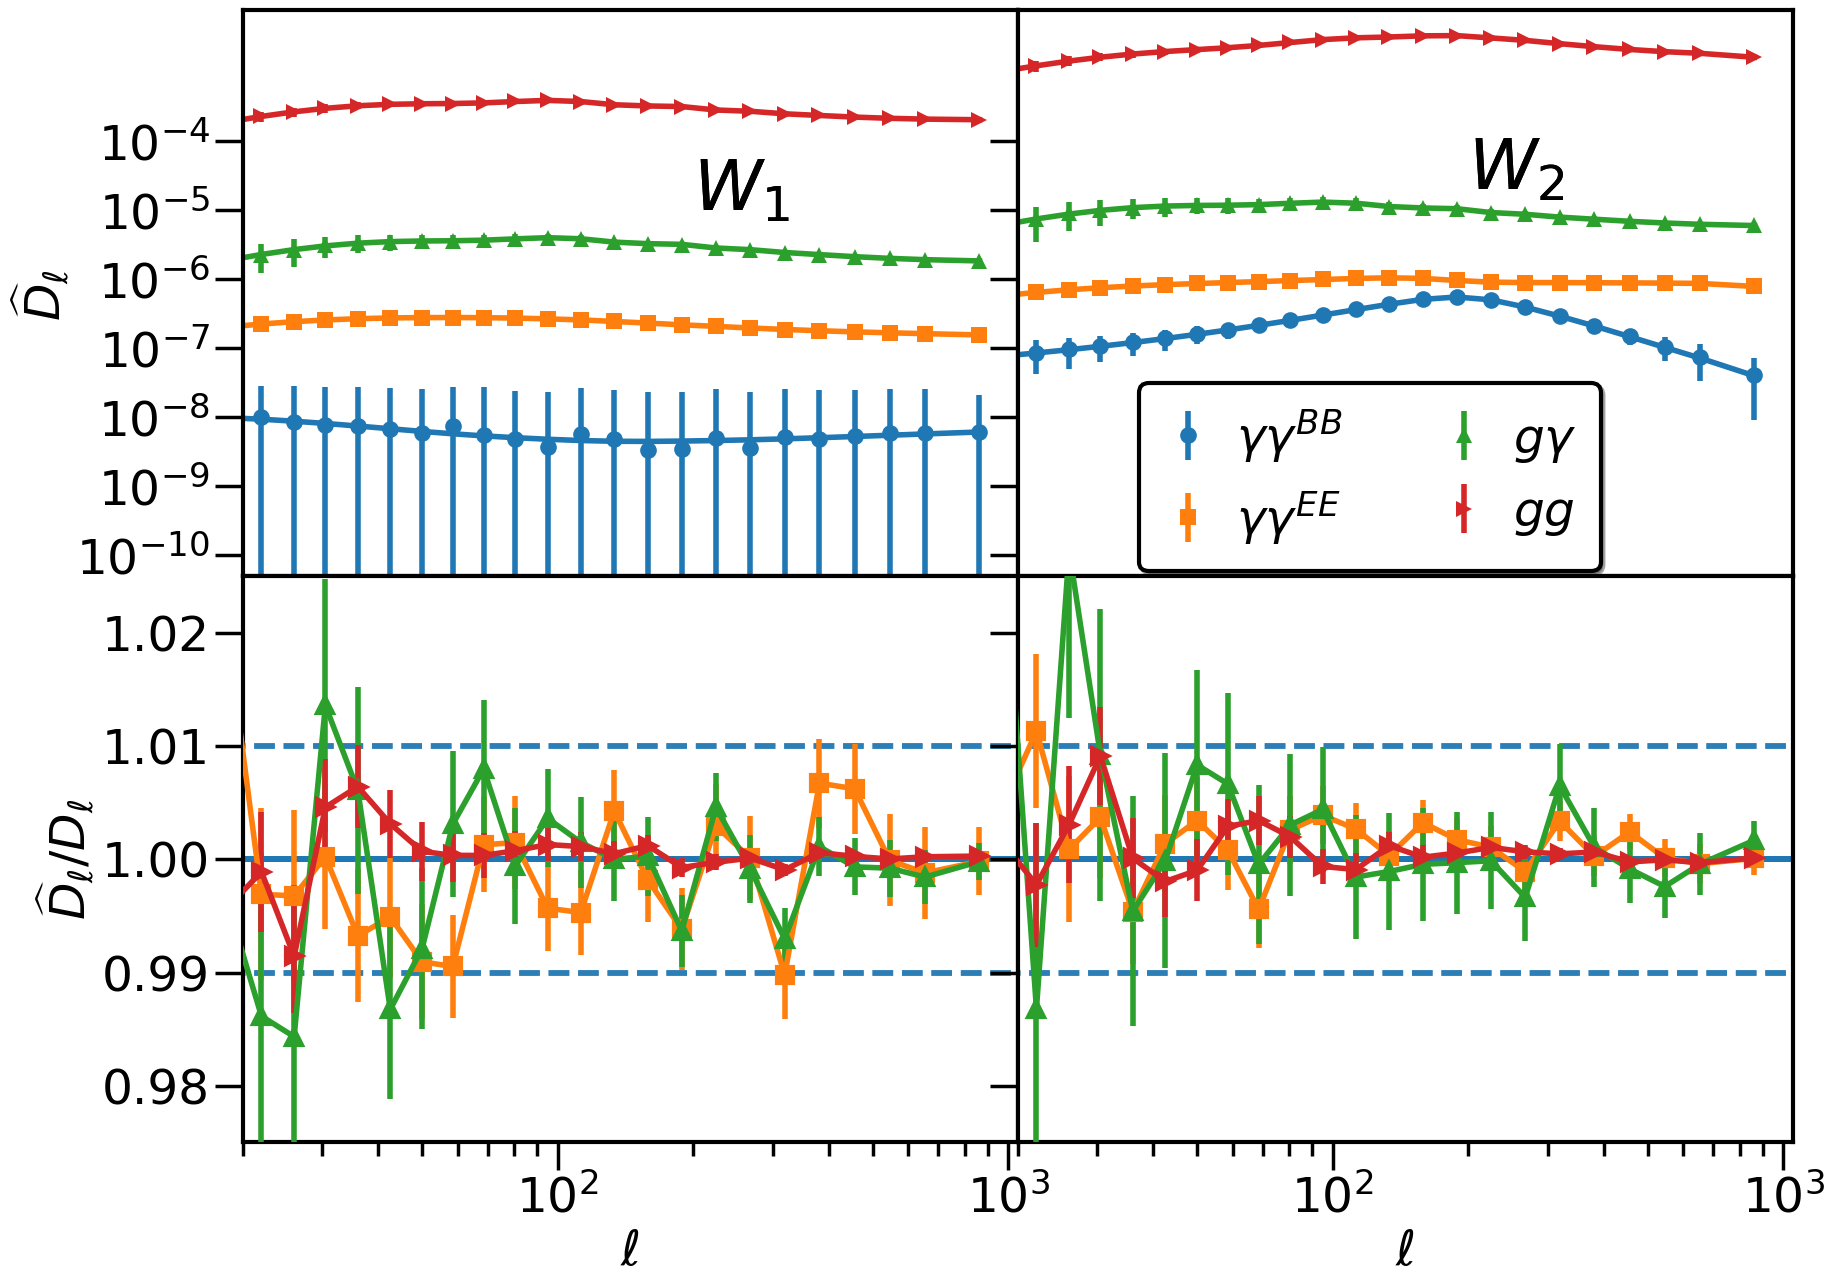

In [12]:
f=1
corr_i=0
fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
    for simj in fnames.keys():#np.arange(1):
        cl_simi=cl_sim_W[simj]
#         else:
#             cl_simi=cl_sim_Ww
        l_bins=cl_simi['l_bins']
        l=cl_simi['l']
        lb=0.5*(l_bins[1:]+l_bins[:-1])
        pS=ax[0,simj]
        pR=ax[1,simj]
        
#         nsim=cl_simi['nsim']
        f=lb
        f2=f/sqrt(nsim)
        i=0
        nlb=len(lb)
        if corr==corr_ll and corr_i==0:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels['shear_B'])
#             pcli=cl_simi['cl0_b'][len(lb):2*len(lb)]@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
            clt=cl_simi['cl0_b'][corr]
#             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
            pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
            pS.plot(lb,f*pcli,c=color)
            f=0#1./pcli
        else:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels[corr])
            pS.plot(lb,f*cl_simi['pcl0'][corr],c=color)
            f=1./cl_simi['pcl0'][corr]
        f2=f/sqrt(nsim)
        pR.errorbar(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)

        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.975,1.025)
        pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_yscale('log')
        pS.set_ylim(5.e-11,8.e-3)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_xlim(20,1050)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
            pS.set_ylabel(r'$\widehat D_\ell$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
            if simj==1:
                pS.text(x=200,y=2.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
ax[0,1].legend(ncol=2,loc='lower left',bbox_to_anchor=(0.15,-0))
ax[0,0].set_yticks(np.logspace(-10,-4,7))

fname=fnames[0].split('.pkl')[0]
fname=fname.split('tests')[1]
fname=fname.split('.')
fname=fname[0]+fname[1]
fname=fig_home+fname
fname+='.pdf'
# fig.savefig(fname,bbox_inches='tight',format='pdf')
print('saved to ',fname)    
show()

('shear', 'shear') 0
('shear', 'shear') 1
('galaxy', 'shear') 2
('galaxy', 'galaxy') 3
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW_pcl_Master.pdf


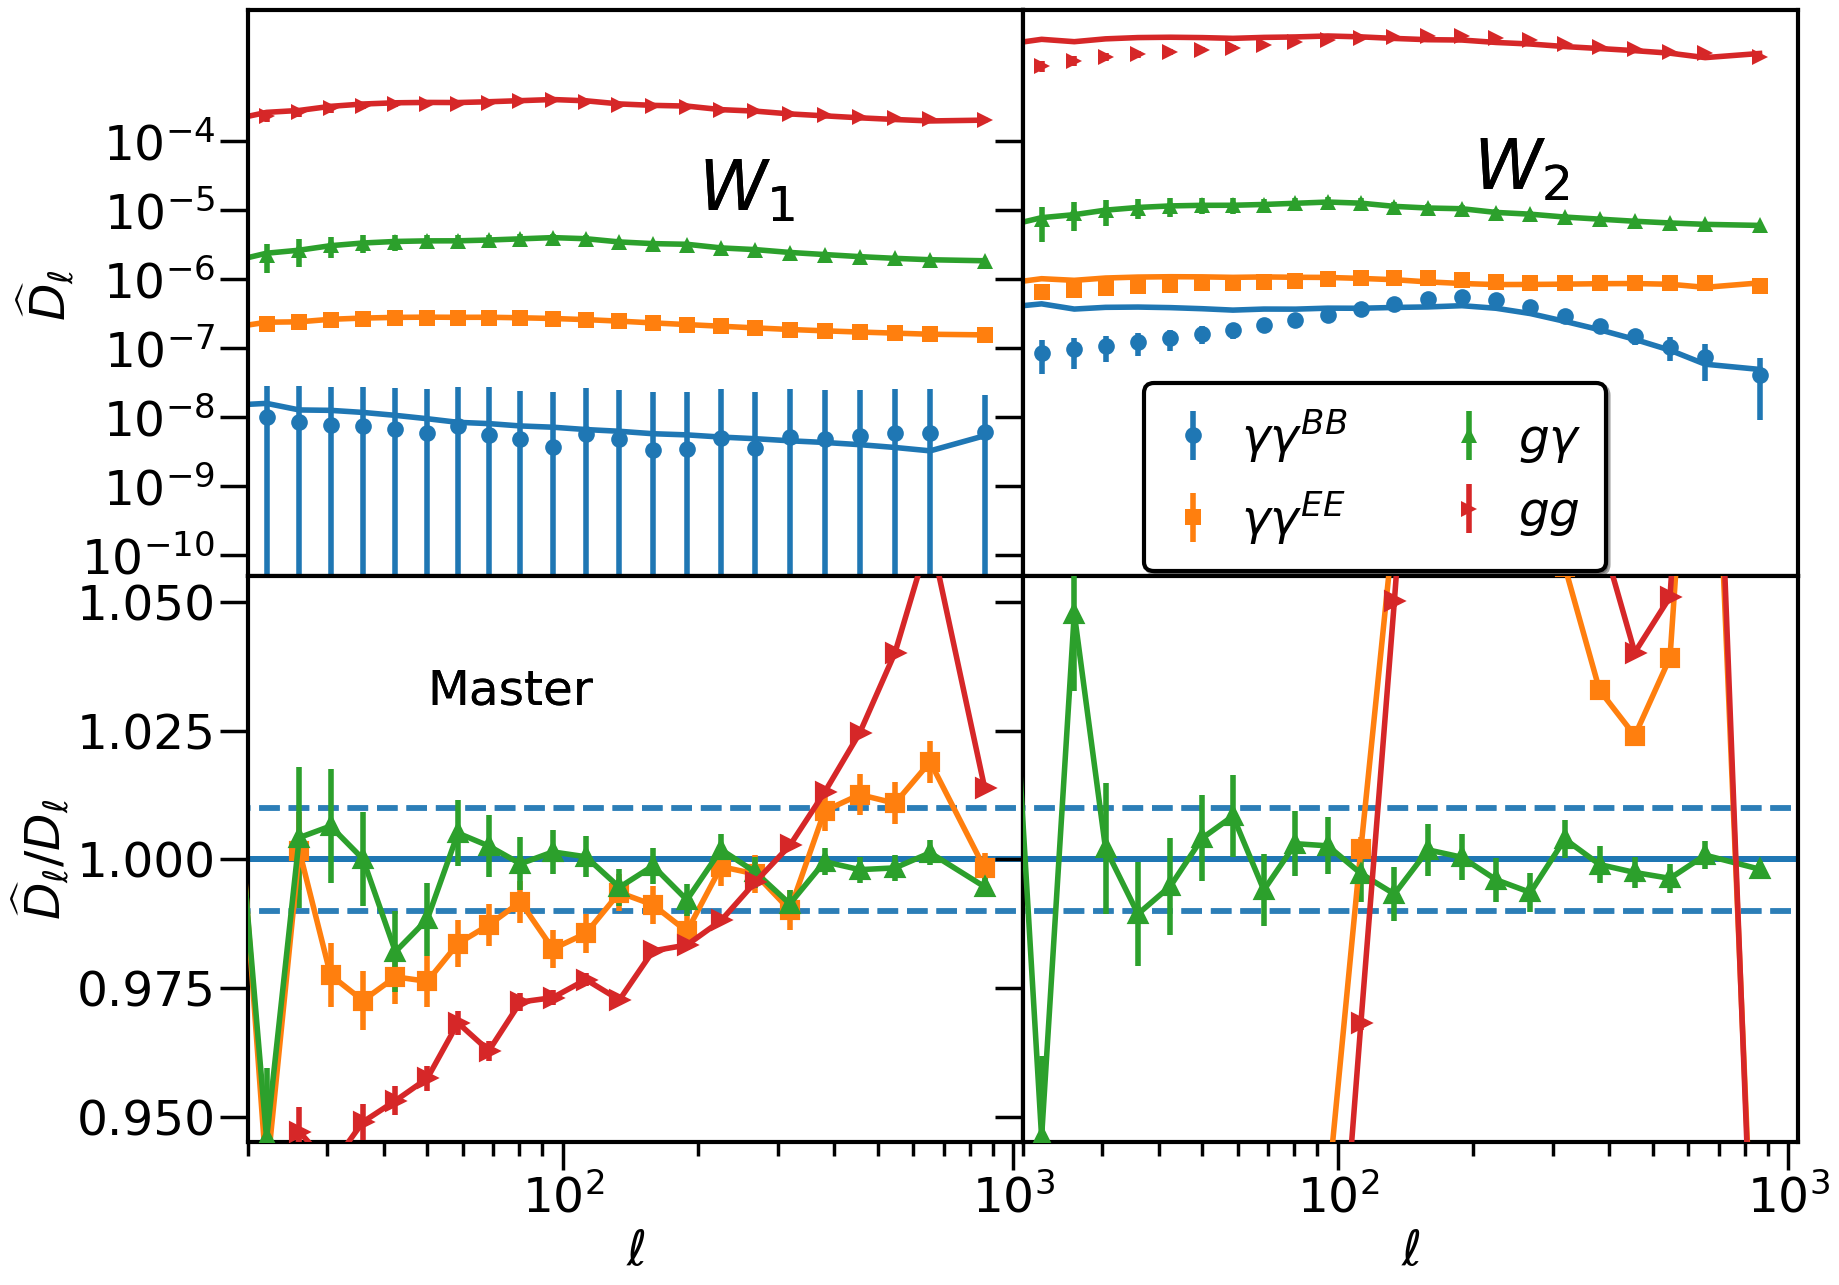

('shear', 'shear') 0
('shear', 'shear') 1
('galaxy', 'shear') 2
('galaxy', 'galaxy') 3
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW_pcl_iMaster.pdf


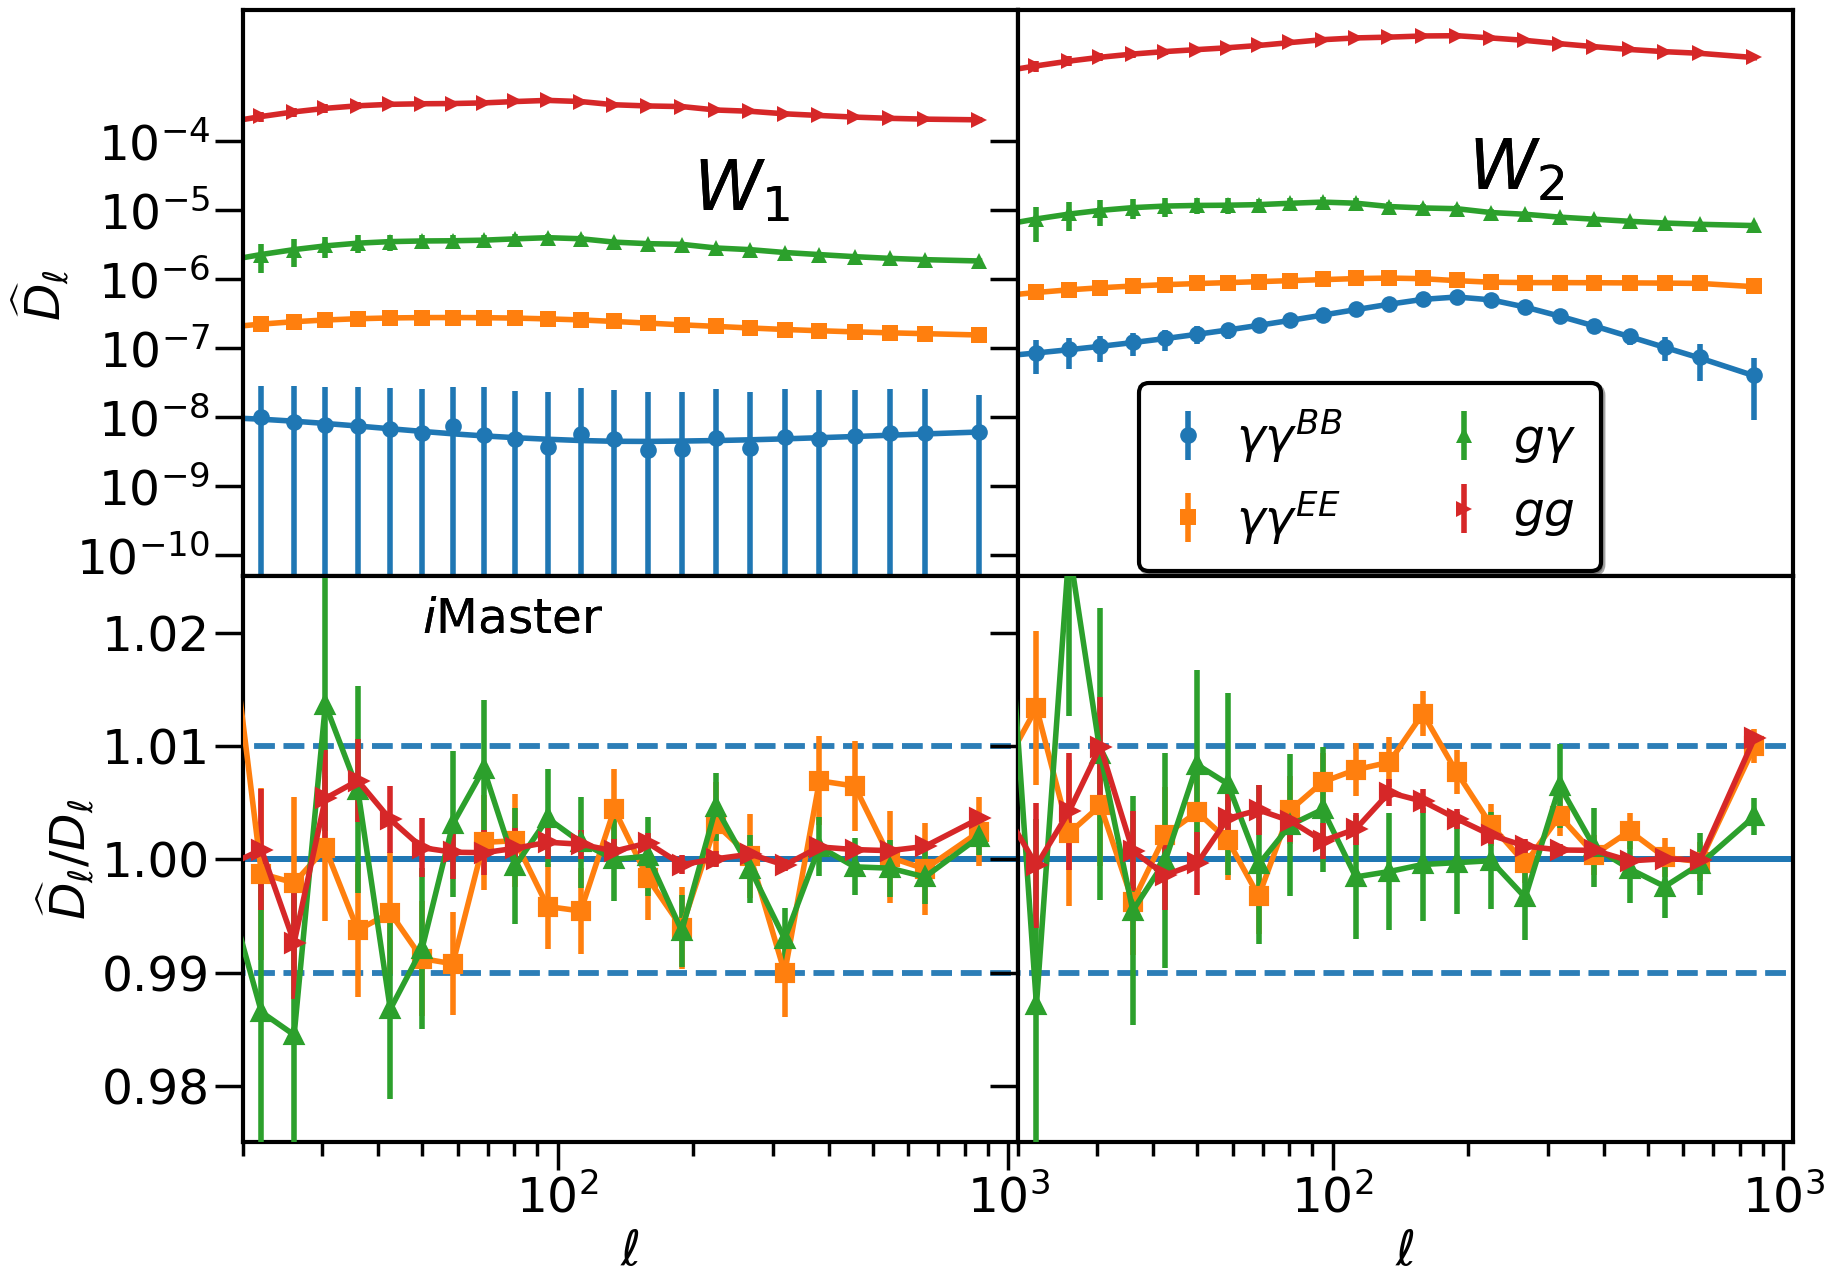

('shear', 'shear') 0
('shear', 'shear') 1
('galaxy', 'shear') 2
('galaxy', 'galaxy') 3
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW_pcl_nMaster.pdf


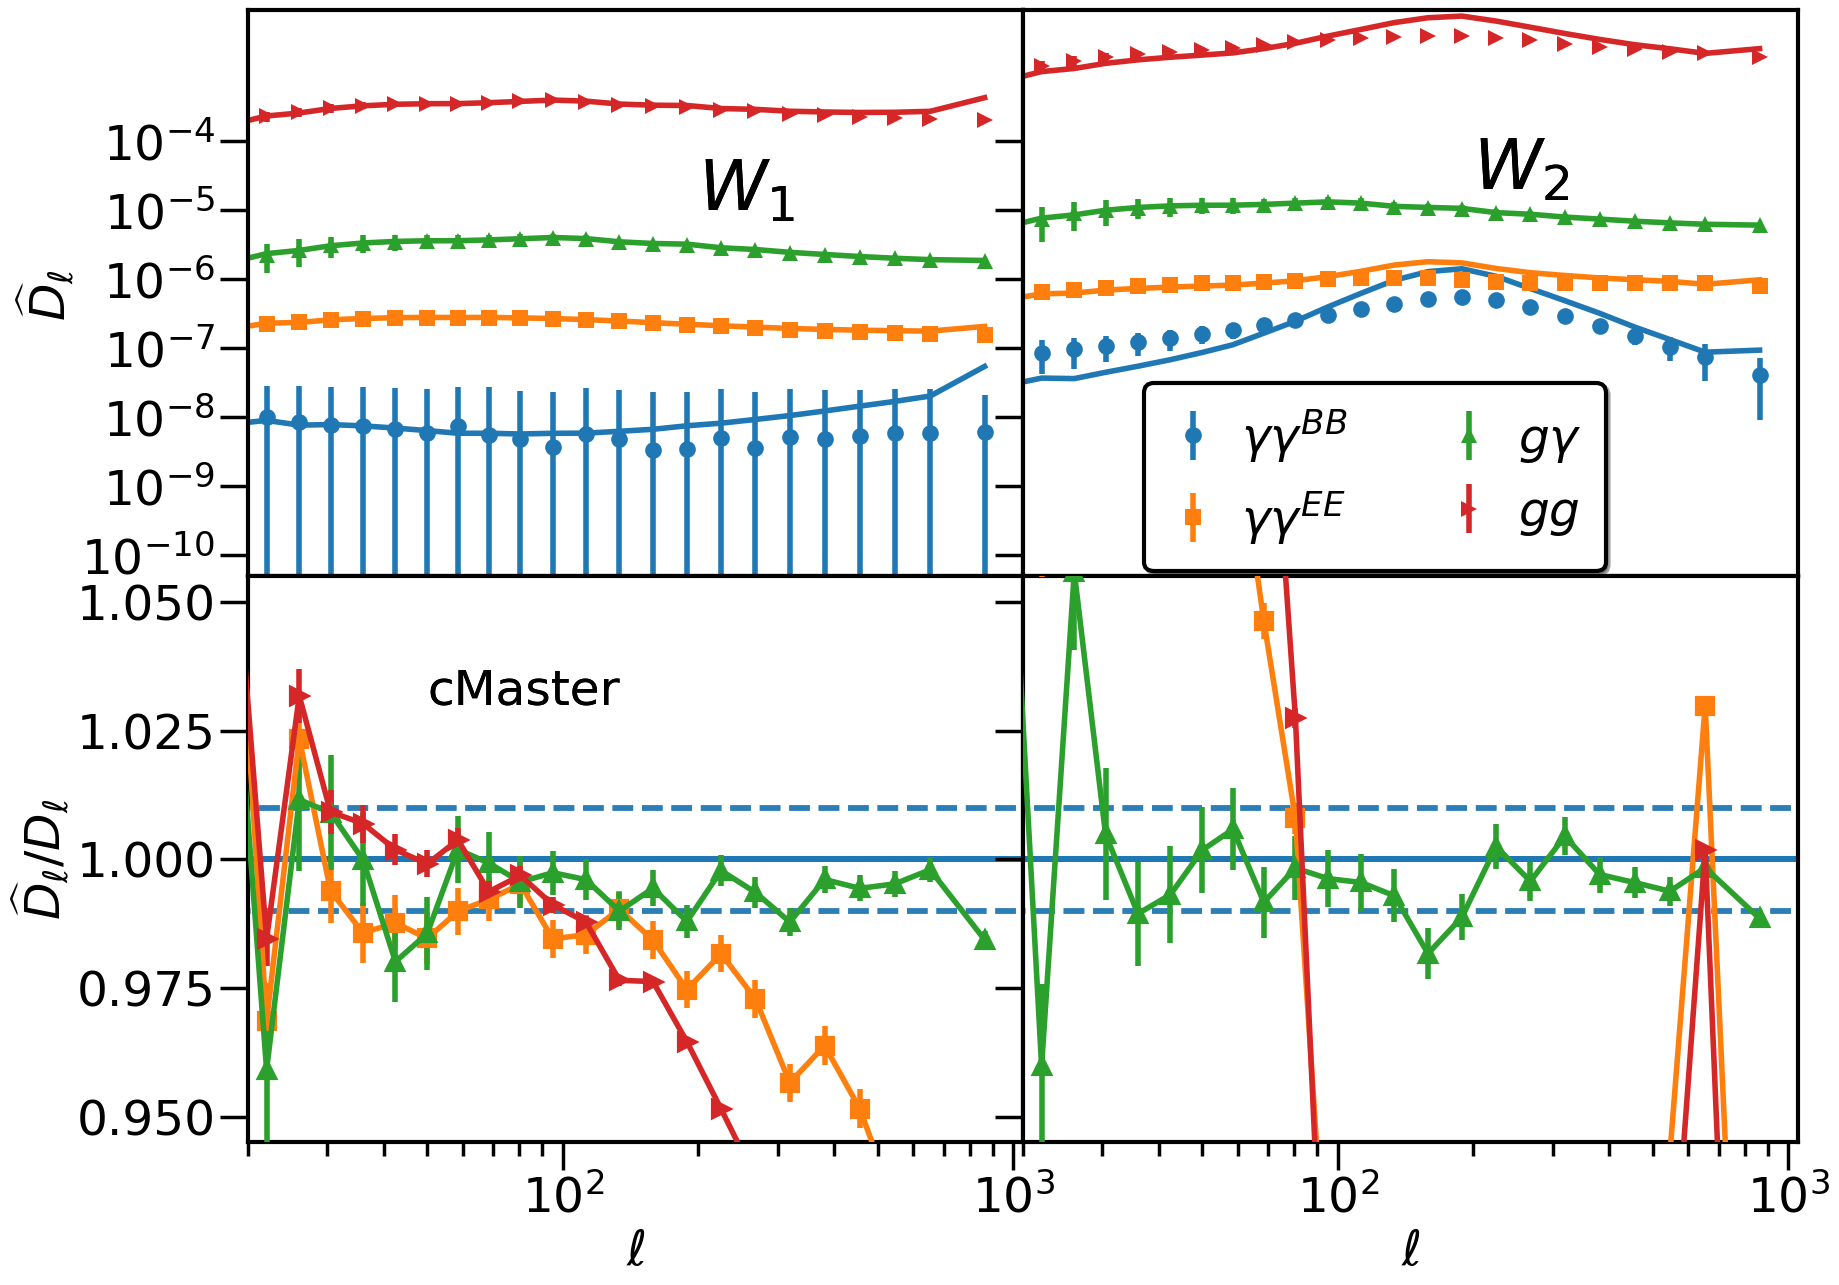

In [56]:
f=1
k='Master'
for k in ['Master','iMaster','nMaster']:
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    corr_i=0
    for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
        color=colors[corr_i]
        marker=markers[corr_i]
        print(corr,corr_i)
        for simj in fnames.keys():#np.arange(1):
            cl_simi=cl_sim_W[simj]
    #         else:
    #             cl_simi=cl_sim_Ww
            l_bins=cl_simi['l_bins']
            l=cl_simi['l']
            lb=0.5*(l_bins[1:]+l_bins[:-1])
            pS=ax[0,simj]
            pR=ax[1,simj]

    #         nsim=cl_simi['nsim']
            f=lb
            f2=f/sqrt(nsim)
            i=0
            nlb=len(lb)
            if corr==corr_ll and corr_i==0:
                pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                        fmt=marker,c=color,label=corr_labels['shear_B'])
    #             pcli=cl_simi['cl0_b'][len(lb):2*len(lb)]@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
                clt=cl_simi['cl0_b'][corr]
    #             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k]['shear_B']
                pS.plot(lb,f*pcli,c=color)
                f=0#1./pcli
            else:
                pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                        fmt=marker,c=color,label=corr_labels[corr])
                clt=cl_simi['cl0_b'][corr]
    #             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k][corr]
                pS.plot(lb,f*pcli,c=color)

                f=1./pcli
            f2=f/sqrt(nsim)
            pR.errorbar(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],
                        f2*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],fmt=marker+'-',c=color,mfc=None,mew=3,zorder=10)

            pR.set_xscale('log')
            # yscale('log')
            pR.set_ylim(.945,1.055)
            if k=='iMaster':
                pR.set_ylim(.975,1.025)
            pR.hlines(1,10,3000)
            pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
            pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)

            pS.set_yscale('log')
            pS.set_ylim(5.e-11,8.e-3)
    #         tf=.9
    #         if corr==corr_ll:
    #             pS.set_ylim(3.e-7,1.e-6)
    #             pR.set_ylim(.9,1.11)
    #             tf=1
            pR.set_xlim(20,1050)
            pR.set_xlabel(r'$\ell$')
            if simj==0:
                pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
                pS.set_ylabel(r'$\widehat D_\ell$ ')
            if corr==corr_ll:
                if simj==0:
                    pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
                    yt=1.03
                    if k=='iMaster':
                        yt=1.02
                    pR.text(x=50,y=yt,s=master_labels[k],fontsize=35)
                if simj==1:
                    pS.text(x=200,y=2.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
        corr_i+=1
    ax[0,1].legend(ncol=2,loc='lower left',bbox_to_anchor=(0.15,-0))
    ax[0,0].set_yticks(np.logspace(-10,-4,7))

    fname=fnames[0].split('.pkl')[0]
    fname=fname.split('tests')[1]
    fname=fname.split('.')
    fname=fname[0]+fname[1]
    fname+='_pcl_'+k
    fname=fig_home+fname
    fname+='.pdf'
    fig.savefig(fname,bbox_inches='tight',format='pdf')
    print('saved to ',fname)    
    show()

('shear', 'shear') 0
('shear', 'shear') 1
('galaxy', 'shear') 2
('galaxy', 'galaxy') 3
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW_pcl_master_comp.pdf


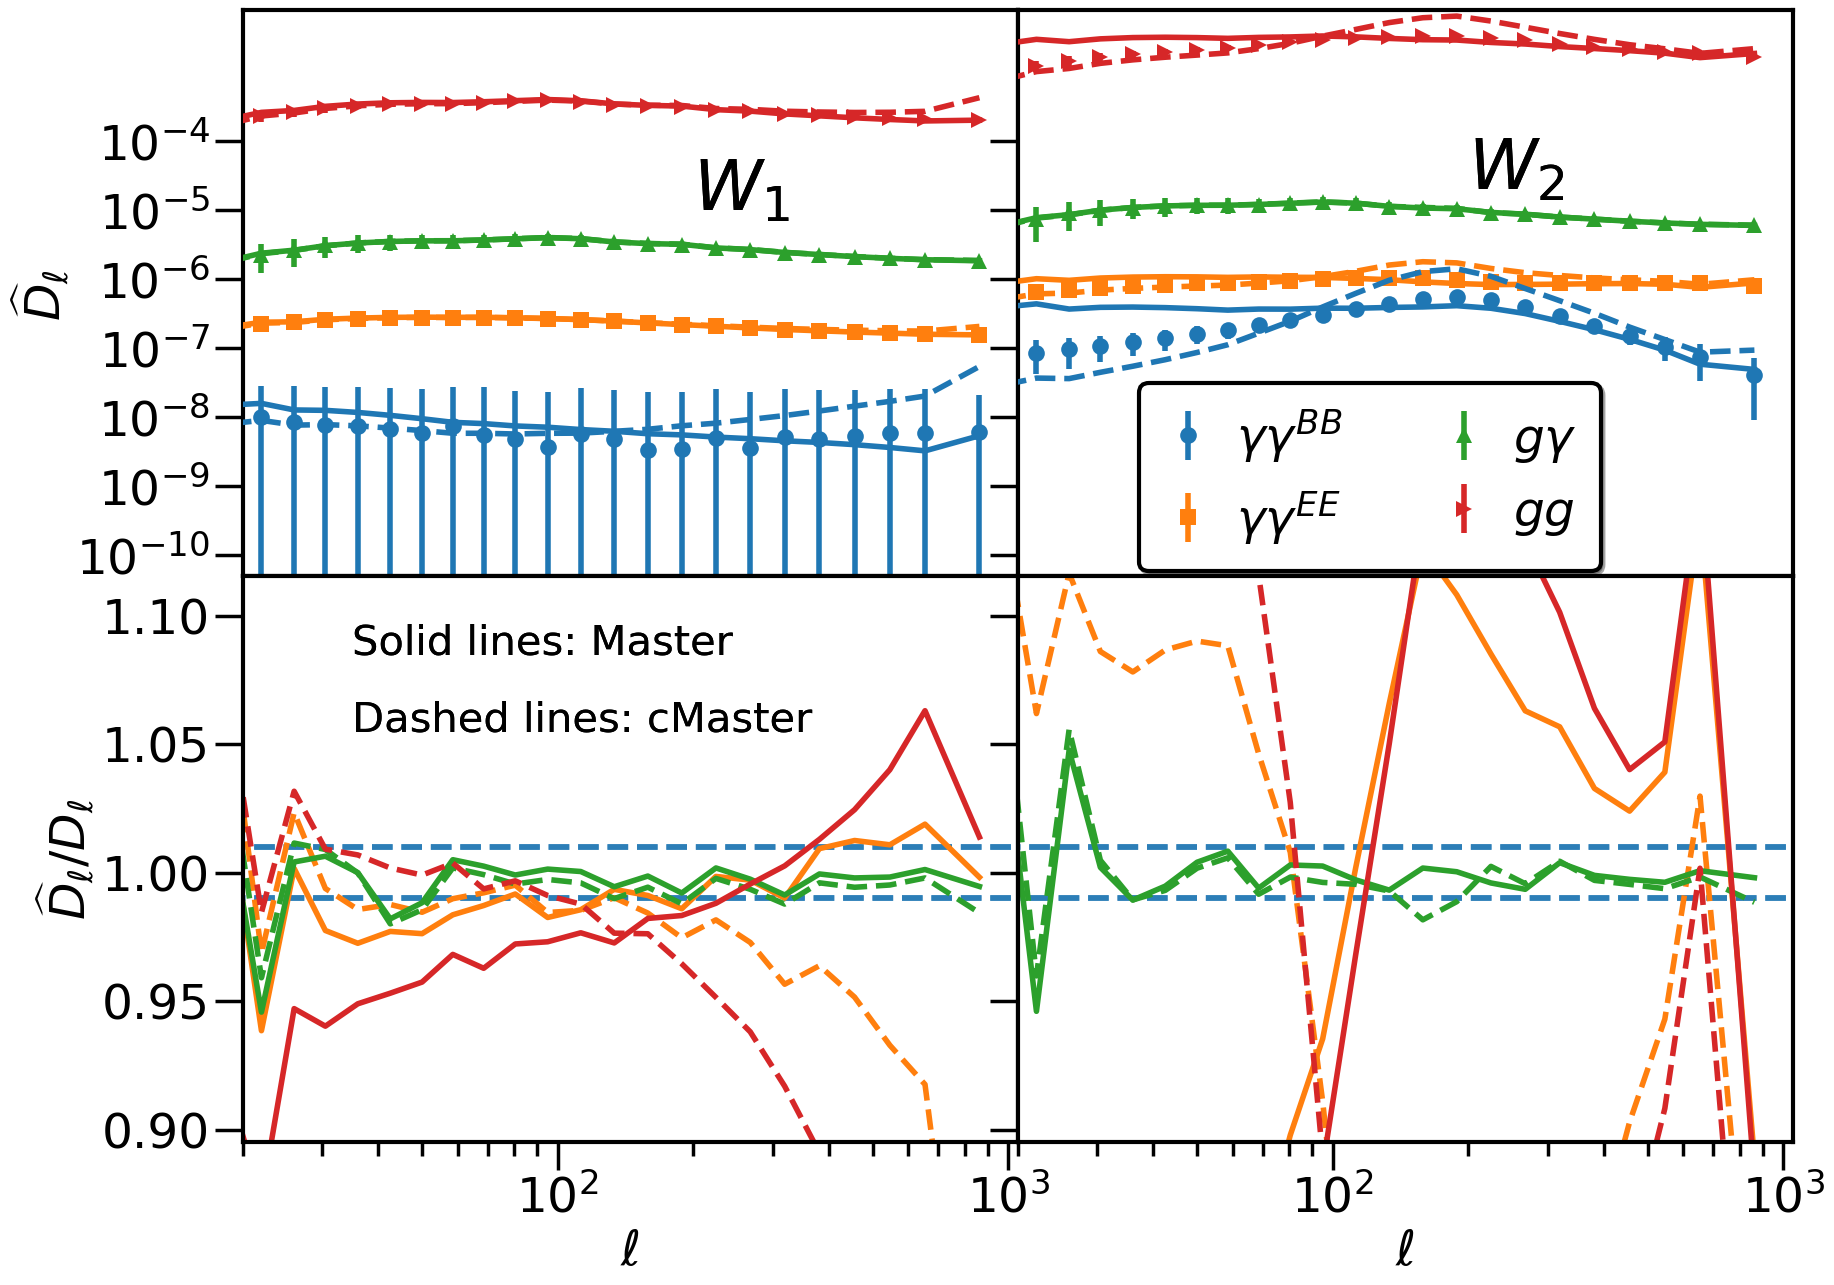

In [53]:
f=1
fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
corr_i=0
for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
    for simj in fnames.keys():#np.arange(1):
        cl_simi=cl_sim_W[simj]
#         else:
#             cl_simi=cl_sim_Ww
        l_bins=cl_simi['l_bins']
        l=cl_simi['l']
        lb=0.5*(l_bins[1:]+l_bins[:-1])
        pS=ax[0,simj]
        pR=ax[1,simj]

#         nsim=cl_simi['nsim']
        f=lb
        f2=f/sqrt(nsim)
        i=0
        nlb=len(lb)
        k_ls=['-','--']#,'-']
        if corr==corr_ll and corr_i==0:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels['shear_B'])
#             pcli=cl_simi['cl0_b'][len(lb):2*len(lb)]@cl_simi['coupling_M']['full']['coupling_M_binned']['iMaster']['shear_B']
            clt=cl_simi['cl0_b'][corr]
#             clt=cl_simi['cl0_b'].reshape(4,nlb)[1]
            
            ik=0
            for k in ['Master','nMaster']:#,'iMaster']:
                f=lb
                f2=f/sqrt(nsim)
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k]['shear_B']
                pS.plot(lb,f*pcli,c=color,ls=k_ls[ik],zorder=10+ik)
                ik+=1
                f=0#1./pcli
        else:
            pS.errorbar(lb,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],f*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],
                    fmt=marker,c=color,label=corr_labels[corr])
            clt=cl_simi['cl0_b'][corr]
            ik=0
            for k in ['Master','nMaster']:#,'iMaster']:
                f=lb
                f2=f/sqrt(nsim)
                pcli=clt@cl_simi['coupling_M']['full']['coupling_M_binned'][k][corr]
                pS.plot(lb,f*pcli,c=color,ls=k_ls[ik],zorder=10+ik)
                f=1./pcli
                f2=f/sqrt(nsim)
                if ik<2:
                    pR.plot(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],ls=k_ls[ik],c=color)
                else:
                    pR.plot(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],ls=k_ls[ik],c=color,alpha=0.5)
#                 else:
#                     pR.errorbar(lb*1.0,f*cl_simi['pcl_b_stats']['mean'].reshape(4,nlb)[corr_i],
#                         f2*cl_simi['pcl_b_stats']['std'].reshape(4,nlb)[corr_i],fmt=marker+k_ls[ik],c=color,mfc=None,mew=3,zorder=10)
                ik+=1

        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.895,1.1155)
#         pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)

        pS.set_yscale('log')
        pS.set_ylim(5.e-11,8.e-3)
#         tf=.9
#         if corr==corr_ll:
#             pS.set_ylim(3.e-7,1.e-6)
#             pR.set_ylim(.9,1.11)
#             tf=1
        pR.set_xlim(20,1050)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat D_\ell/D_\ell$')
            pS.set_ylabel(r'$\widehat D_\ell$ ')
        if corr==corr_ll:
            if simj==0:
                pS.text(x=200,y=1.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
#                 pR.text(x=35,y=1.045,s='Solid lines: '+master_labels['iMaster'],fontsize=30)
                pR.text(x=35,y=1.085,s='Solid lines: '+master_labels['Master'],fontsize=30)
                pR.text(x=35,y=1.055,s='Dashed lines: '+master_labels['nMaster'],fontsize=30)
            if simj==1:
                pS.text(x=200,y=2.e-5,s=r'$W_'+str(simj+1)+'$',fontsize=50)
    corr_i+=1
ax[0,1].legend(ncol=2,loc='lower left',bbox_to_anchor=(0.15,-0))
ax[0,0].set_yticks(np.logspace(-10,-4,7))

fname=fnames[0].split('.pkl')[0]
fname=fname.split('tests')[1]
fname=fname.split('.')
fname=fname[0]+fname[1]
fname+='_pcl_master_comp'
fname=fig_home+fname
fname+='.pdf'
fig.savefig(fname,bbox_inches='tight',format='pdf')
print('saved to ',fname)    
show()

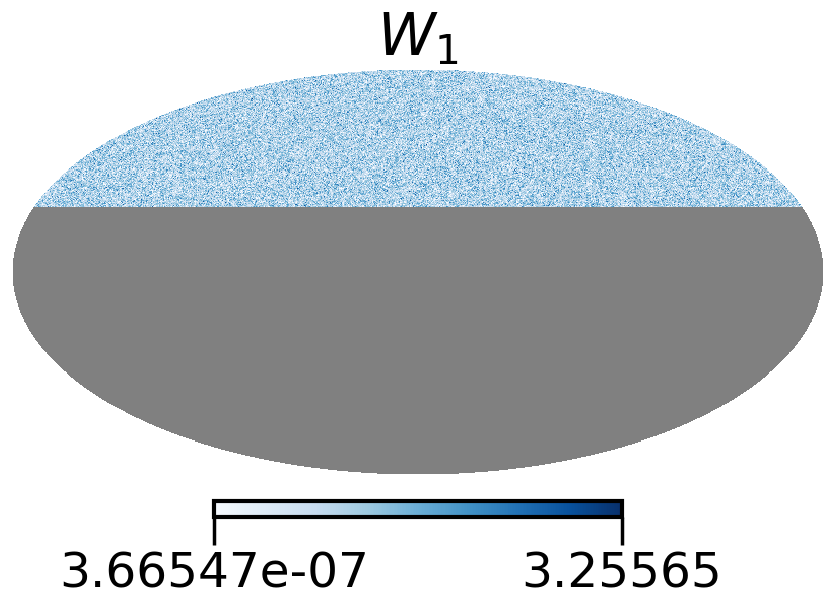

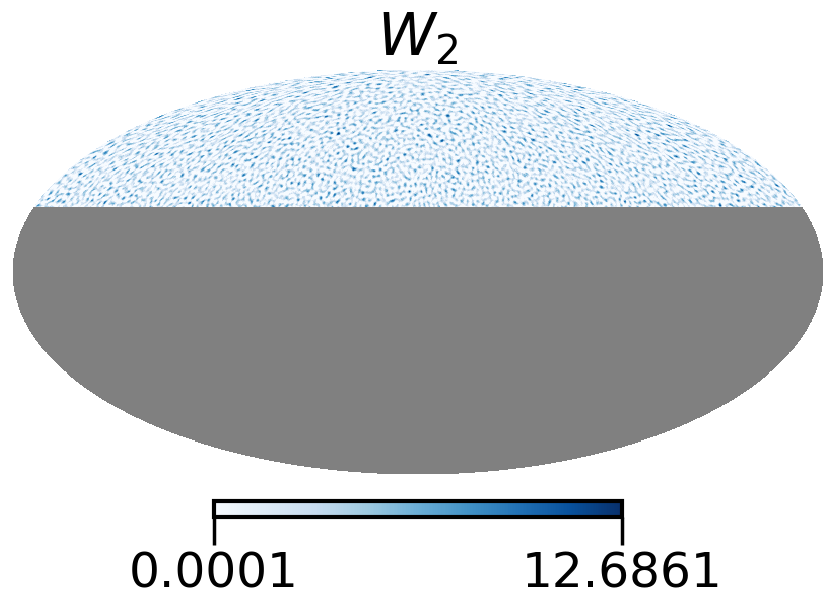

In [31]:
a=hp.mollview(zs_bin[0][0]['window'],title=r'$W_1$',cmap='Blues',return_projected_map=True)
hp.mollview(zs_bin[1][0]['window'],title=r'$W_2$',cmap='Blues')


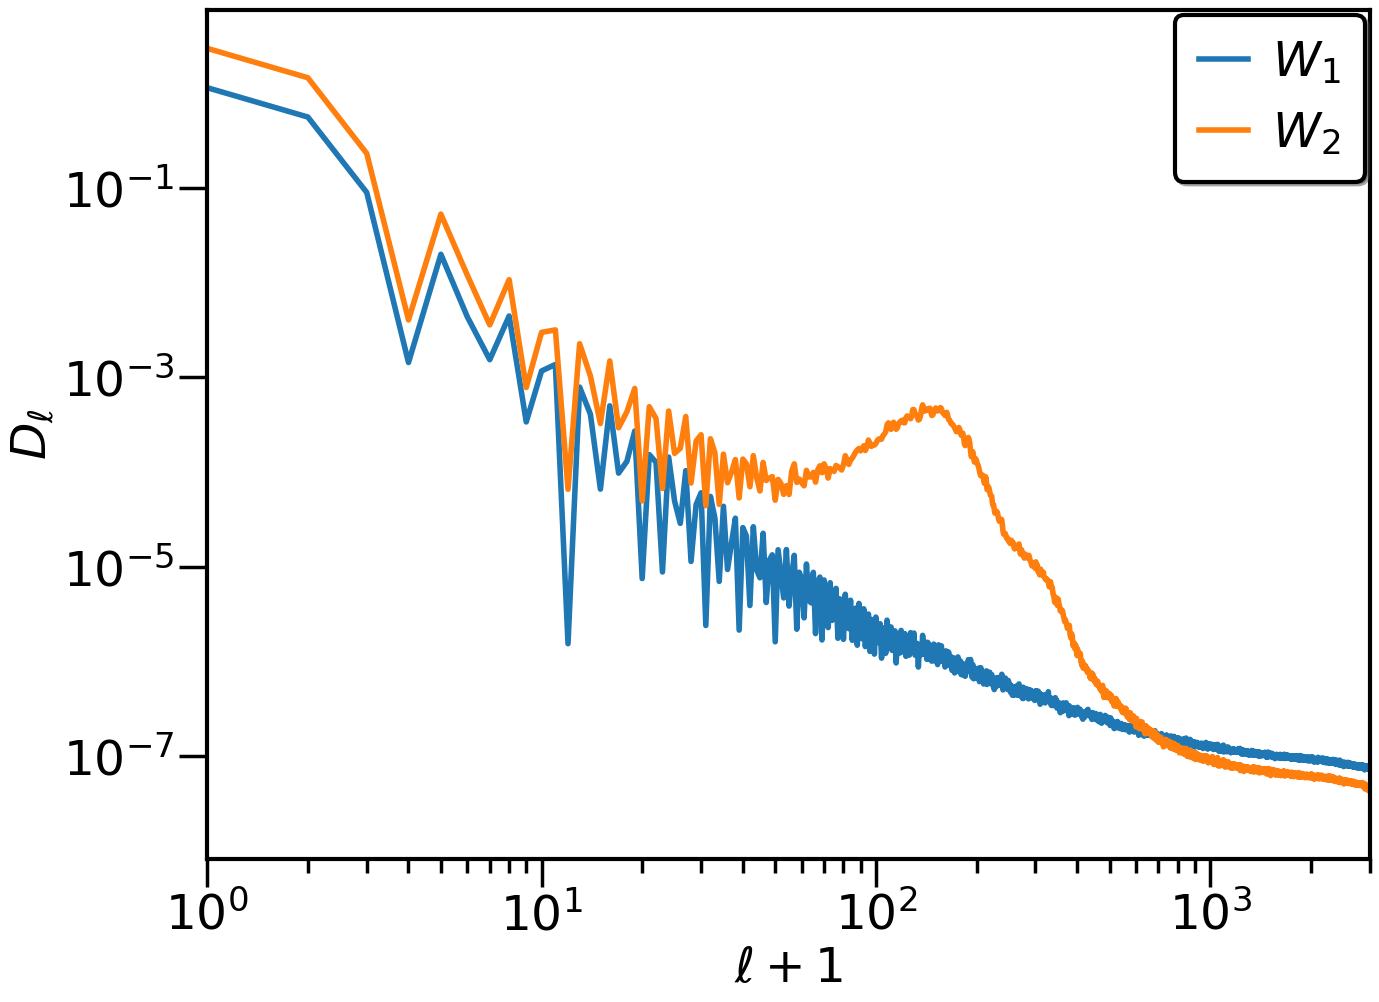

In [38]:
wl1=hp.anafast(zs_bin[0][0]['window'])
wl2=hp.anafast(zs_bin[1][0]['window'])
lt=np.arange(len(wl1))
plot(1+lt,wl1,label=r'$W_1$')
plot(1+lt,wl2,label=r'$W_2$')
loglog()
legend()
xlabel(r'$\ell+1$')
ylabel(r'$D_\ell$')
xlim(1,3000)
fname='window_power_spectra'
fname=fig_home+fname
fname+='.pdf'
savefig(fname,bbox_inches='tight',format='pdf')


('shear', 'shear') 1
('shear', 'shear') [1.11813013 1.03300854 1.02631502 0.9942331  0.9971805  1.00226685
 0.99251039 0.99573717 0.99076091 0.98976725 1.00222726 1.00199119
 0.9955069  0.99500273 1.00500665 0.99823425 0.99350029 1.00343669
 1.00039614 0.98923529 1.007374   1.0067313  1.00008477 0.99901841
 1.00252607]
('shear', 'shear') [1.11598635 0.9870378  1.00779495 1.0168582  0.99841126 1.00599689
 0.99221275 1.0014577  1.00380708 1.00051087 0.99263825 1.00401417
 1.00734733 1.00916574 1.01020303 1.0185336  1.0097747  1.00211891
 0.99472633 1.00312244 0.99922523 1.00464241 0.99953444 0.99582357
 1.01174979]
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW_ll.pdf


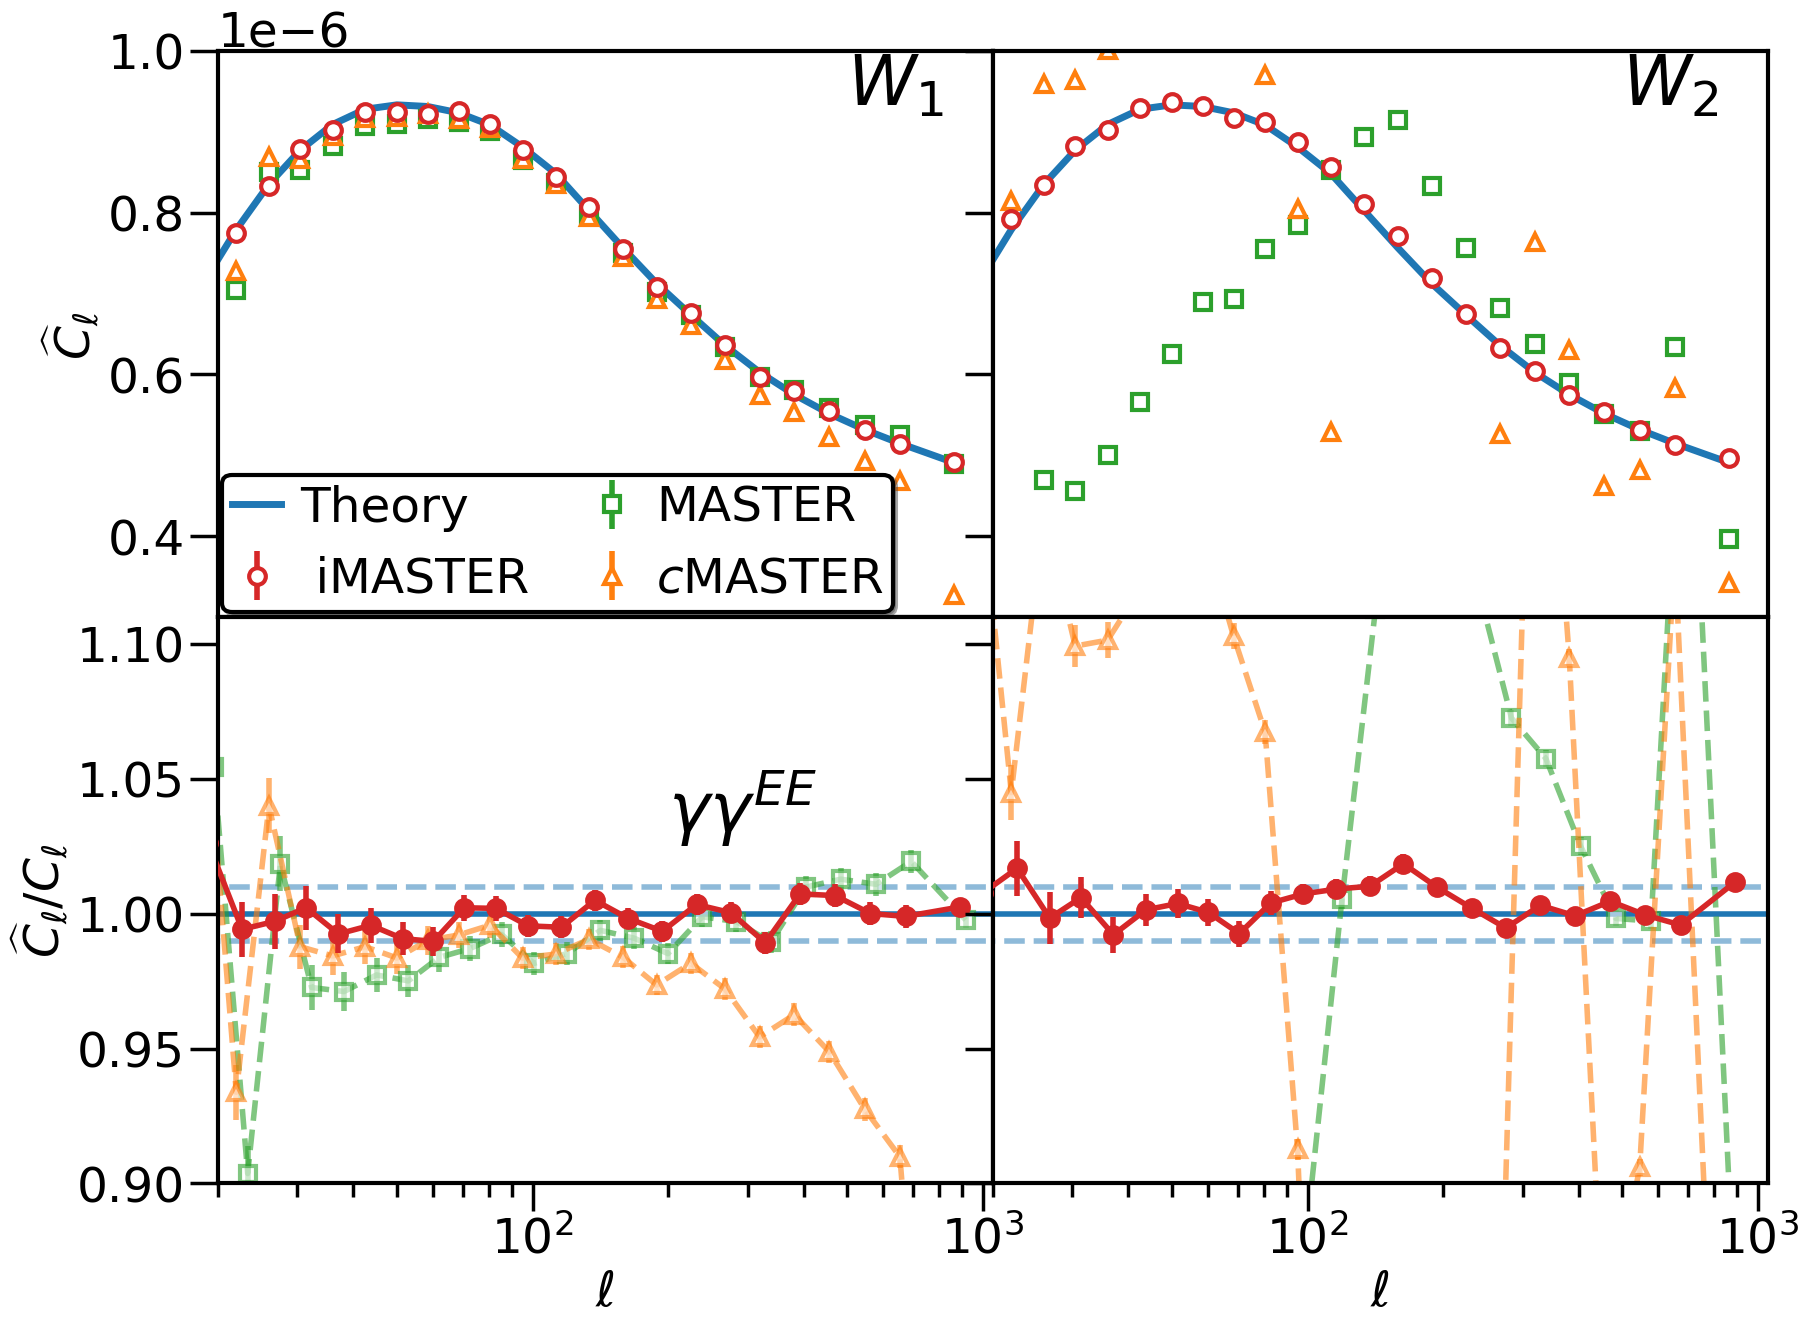

('galaxy', 'shear') 2
('galaxy', 'shear') [1.10934645 1.05364695 0.98921941 0.98570938 0.97832557 1.01876525
 1.00750603 0.98421257 0.99162177 1.00362068 1.00893271 0.99869189
 1.00391867 1.0014638  0.99992268 1.00047407 0.99324089 1.00495554
 0.99914362 0.99273157 1.00124965 0.99931417 0.99922189 0.99840264
 1.00200145]
('galaxy', 'shear') [1.07534739 1.022267   1.0438071  0.97126762 1.03829955 1.00845667
 0.99343703 0.99945528 1.00926793 1.00710114 0.99882821 1.00314481
 1.00474482 0.99816216 0.99891252 0.99954103 0.99969897 0.99995667
 0.99641479 1.00670693 1.00098974 0.99915124 0.99757257 0.99956892
 1.00380535]
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW_ggl.pdf


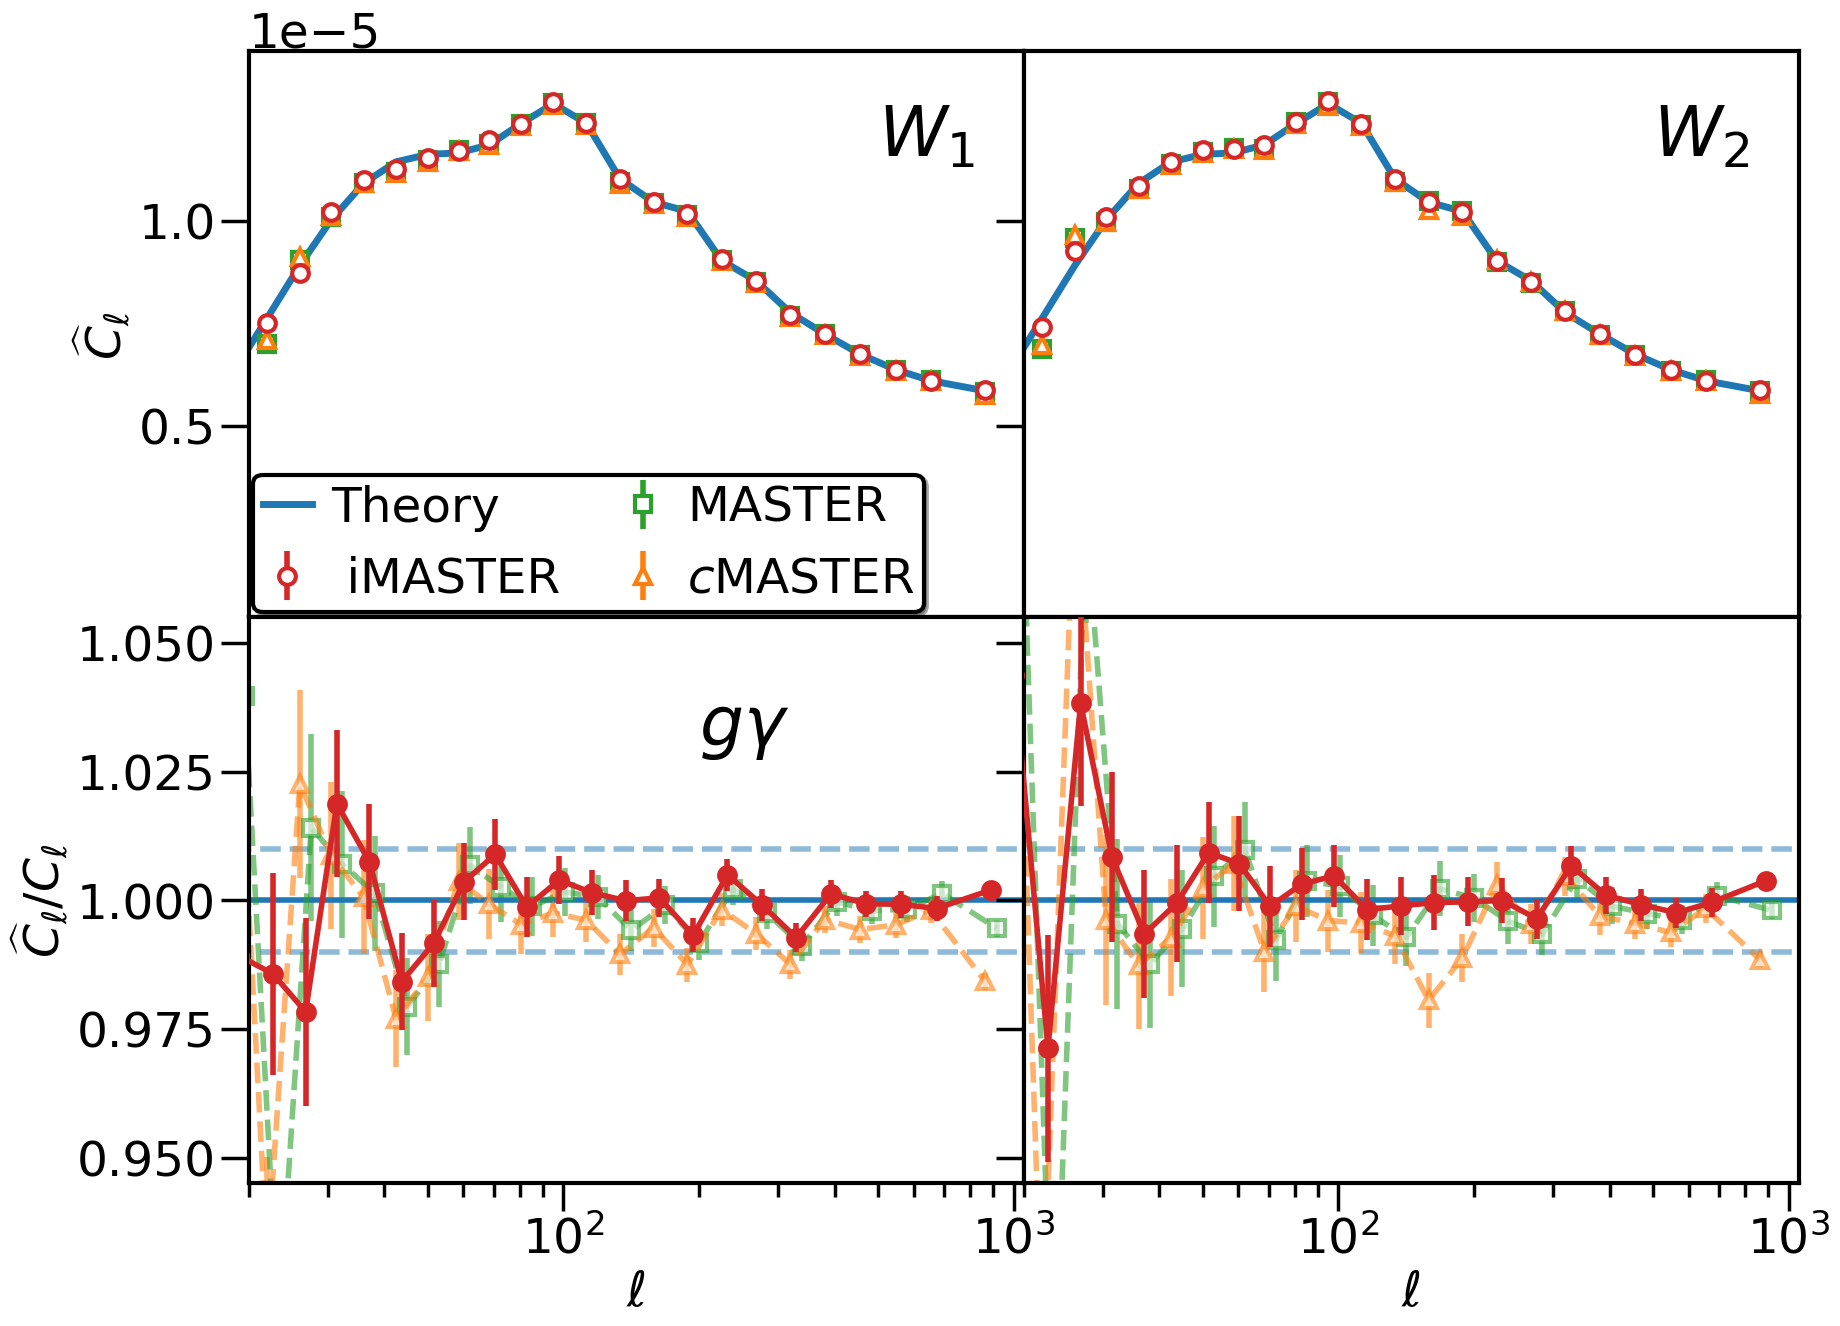

('galaxy', 'galaxy') 3
('galaxy', 'galaxy') [1.10499214 0.98983201 0.99835217 1.00250785 0.98808815 1.00706687
 1.00761605 1.0034467  1.00077463 1.00052786 1.00049073 1.00093098
 1.00153075 1.00133775 1.00063039 1.00153147 0.99935808 0.99996099
 1.00041777 0.99927861 1.00109727 1.00079343 1.00066246 1.00104266
 1.00393483]
('galaxy', 'galaxy') [1.08009226 0.9744241  1.01011587 0.99457933 1.00358997 1.01489641
 0.99798674 0.99547954 0.99672691 1.00373873 1.0049495  1.00334497
 0.99975491 1.00180021 1.0102046  1.0086964  1.00499362 1.00093573
 0.99809703 0.99880253 1.00138738 0.99978617 1.00027613 0.99546723
 1.01289553]
saved to  ./figures//cl0_sims_newN1000_ns1024_lmax1024_wlmax2049_fsky03_deltaW_gg.pdf


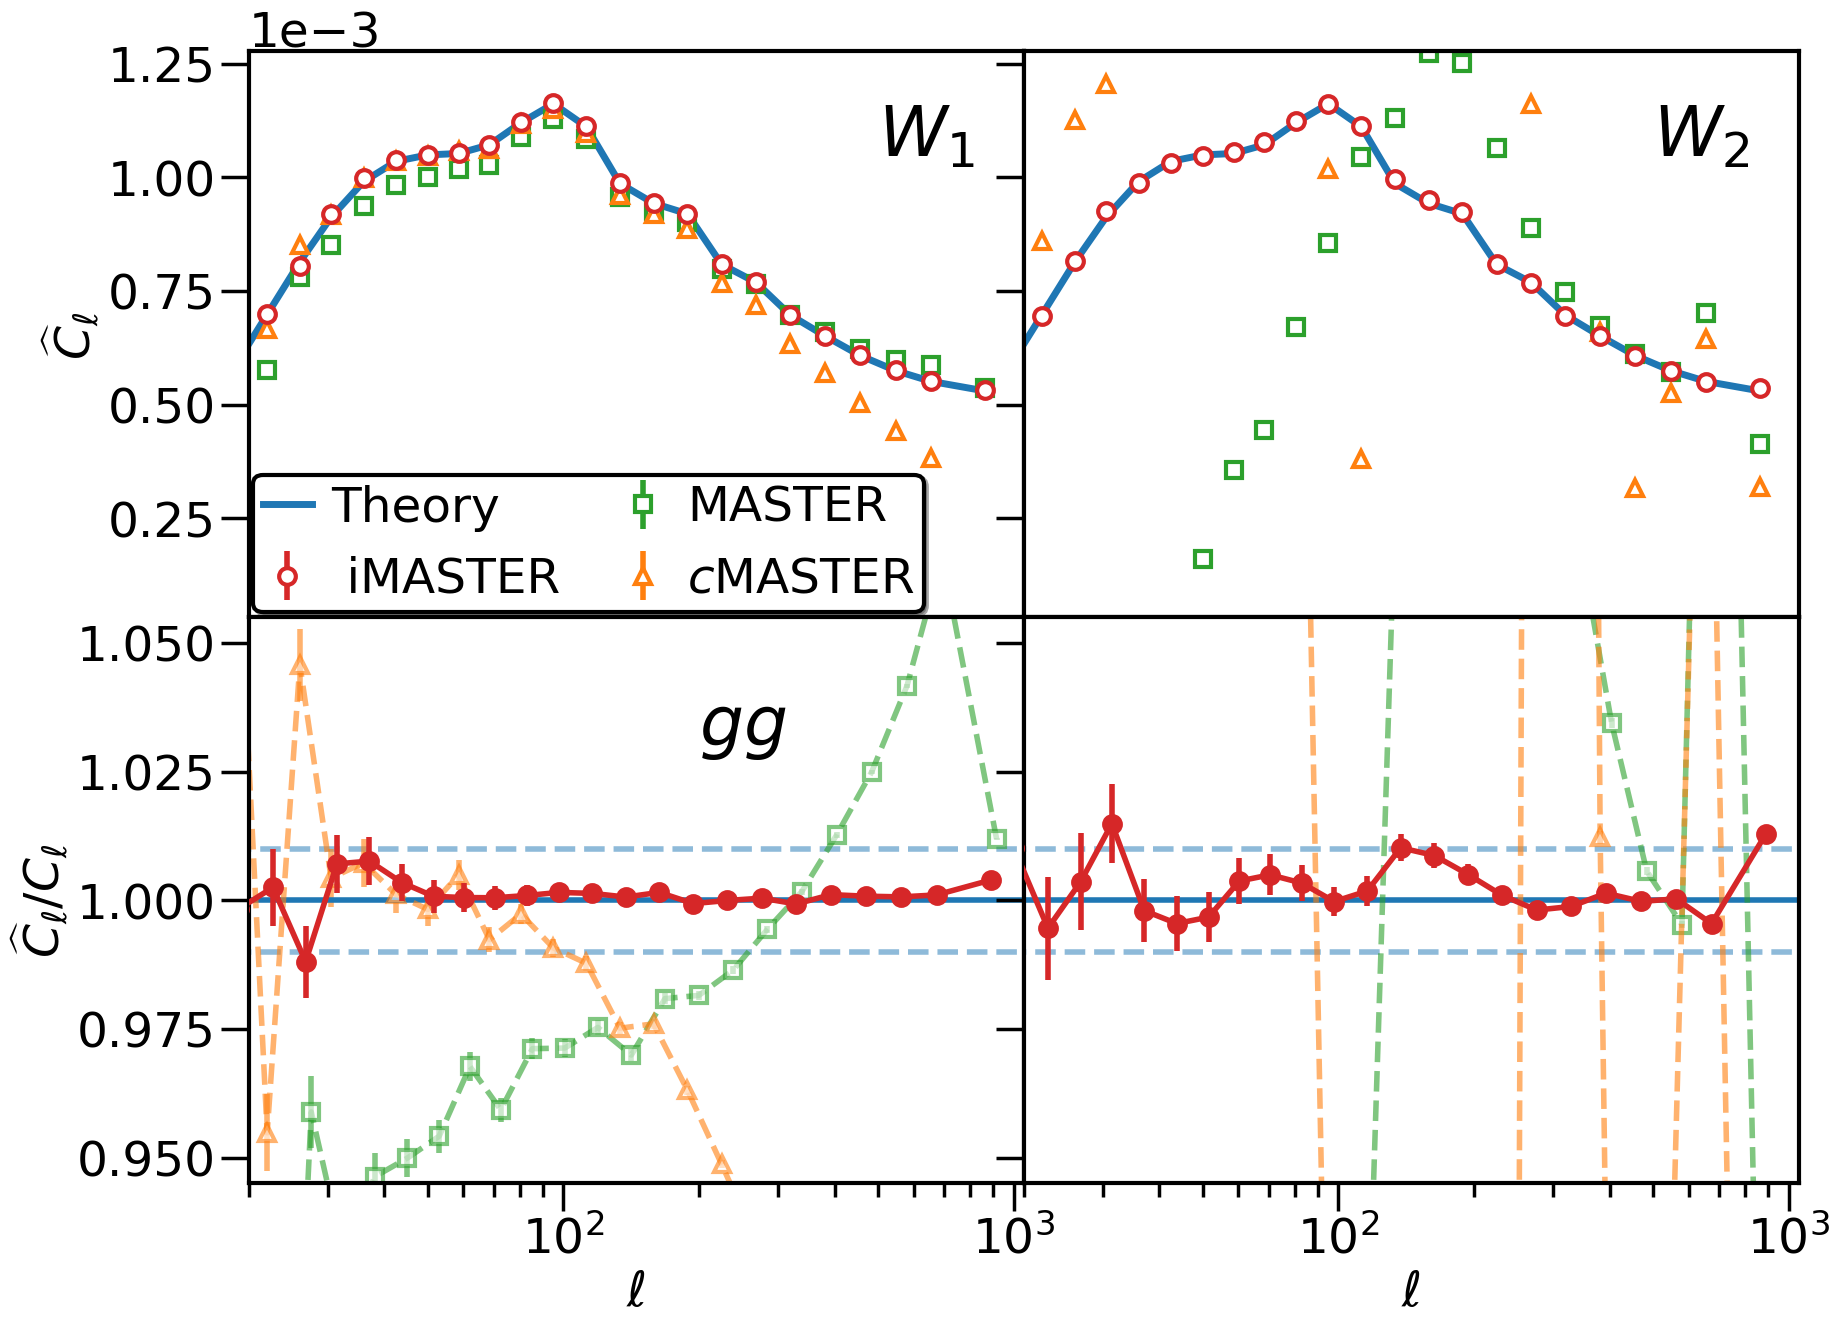

In [14]:
f=1
corr_i=0
for corr in [corr_ll,corr_ll,corr_ggl,corr_gg]:
    if corr_i==0:
        corr_i+=1
        continue
    fig, ax =subplots(2,2,figsize=(20,15),sharex='col',sharey='row')
    color=colors[corr_i]
    marker=markers[corr_i]
    print(corr,corr_i)
    for simj in fnames.keys():#np.arange(1):
        cl_simi=cl_sim_W[simj]
        l_bins=cl_simi['l_bins']
        l=cl_simi['l']
        lb=0.5*(l_bins[1:]+l_bins[:-1])
        
        pS=ax[0,simj]
        pR=ax[1,simj]
        f=lb
        f2=f/sqrt(nsim)
        i=0
        nlb=len(lb)
        cl0i=cl_simi['cl0_b'][corr]#[nlb*corr_i:nlb*corr_i+nlb]
#         cl0i=cl_simi['cl0_b'][nlb*corr_i:nlb*corr_i+nlb]
        
        pS.plot(lb,f*cl0i,c=colors[0],label='Theory',lw=5)
        print(corr,cl_simi['cl_b_stats']['iMaster']['mean'].reshape(4,nlb)[corr_i]/cl0i)
        pS.errorbar(lb,f*cl_simi['cl_b_stats']['iMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['iMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='o',c=colors[3],mfc='white',mew=3,label=r' iMASTER',zorder=10)    
        pS.errorbar(lb*1.0,f*cl_simi['cl_b_stats']['Master']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['Master']['std'].reshape(4,nlb)[corr_i],
                    fmt='s',c=colors[2],mfc='white',mew=3,label=r'MASTER')
        pS.errorbar(lb,f*cl_simi['cl_b_stats']['nMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['nMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='^',c=colors[1],mfc='white',mew=3,label=r'$\it c$MASTER')

        f=1./cl0i
        f2=f/sqrt(nsim)
        pR.errorbar(lb*1.03,f*cl_simi['cl_b_stats']['iMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['iMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='o-',c=colors[3],mfc=None,mew=3,label=r'$\it i$ MASTER',zorder=10)
        pR.errorbar(lb*1.06,f*cl_simi['cl_b_stats']['Master']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['Master']['std'].reshape(4,nlb)[corr_i],
                    fmt='s--',c=colors[2],mfc='white',mew=3,label=r'MASTER',alpha=0.6)
        pR.errorbar(lb,f*cl_simi['cl_b_stats']['nMaster']['mean'].reshape(4,nlb)[corr_i],
                    f2*cl_simi['cl_b_stats']['nMaster']['std'].reshape(4,nlb)[corr_i],
                    fmt='^--',c=colors[1],mfc='white',mew=3,label=r'$\it c$MASTER',alpha=0.6)

        # plot(lb,f*(coupling_M_binned_inv@cl_sim_W['clp_b'][0,:]))
        # plot(l,cl_sim_N['clg_stats']['mean'],'g--')
        pR.set_xscale('log')
        # yscale('log')
        pR.set_ylim(.945,1.055)
        pR.hlines(1,10,3000)
        pR.hlines(1.01,10,3000,ls='--',alpha=0.5,zorder=-1)
        pR.hlines(.99,10,3000,ls='--',alpha=0.5,zorder=-1)
        
        pS.set_ylim((lb*cl0i).min()*.1,(lb*cl0i).max()*1.1)
        tf=.9
        if corr==corr_ll:
            pS.set_ylim(3.e-7,1.e-6)
            pR.set_ylim(.9,1.11)
            tf=1
        pR.set_xlim(20,1050)
        pR.set_xlabel(r'$\ell$')
        if simj==0:
            pR.set_ylabel(r'$\widehat C_\ell/C_\ell$')
            pS.set_ylabel(r'$\widehat C_\ell$ ')#+corr_labels[corr])
        pS.text(x=500,y=(lb*cl0i).max()*tf,s=r'$W_'+str(simj+1)+'$',fontsize=50)
#     if corr==corr_ggl:
    ax[0,0].legend(ncol=2,borderpad=0.2,handletextpad=.4,columnspacing=1.2)
    ax[1,0].text(x=200,y=1.03,s=corr_labels[corr],fontsize=50)
    
    fname=fnames[0].split('.pkl')[0]
    fname=fname.split('tests')[1]
    fname=fname.split('.')
    fname=fname[0]+fname[1]

    fname=fig_home+fname
    fname+='_'+corr_fnames[corr]+'.pdf'
    fig.savefig(fname,bbox_inches='tight',format='pdf')
    print('saved to ',fname)
    show()
    corr_i+=1